# 1 - Perkenalan

* Nama       : Luvi Puspitasari
* Batch      : FTDS-012
* Dataset    : Credit Card Information
* Source Dataset  : ("https://console.cloud.google.com/bigquery?sq=540278567683:c6d41cc460e040f39407d81fc4729f89&project=northern-carver-347907&ws=!1m5!1m4!1m3!1snorthern-carver-347907!2sbquxjob_5a77ea0d_181b9770f9a!3sUS")

Query Google Cloud Platform :

    select *
    from `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
    where mod(CUST_ID,2) = 0;

**Problem :**
- Buat model clustering utnuk melakukan customer segmentation dari data kartu kredit sebuah bank. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

| Tabel Eksisting | Arti | 
| ----------- | :---------: |
| CUST_ID | ID customers |
| BALANCE | Saldo pada akun customer|
| BALANCE_FREQUENCY | Seberapa sering saldo di top up range 0-1 (0= tidak pernah, 1 sering) |
| PURCHASES | jumlah pembelian yang dilakukan dari akun|
| ONEOFF_PURCHASES | Jumlah pembelian maksimum dilakukan tiap pembelian |
| INSTALLMENTS_PURCHASES	 | jumlah pembelian dilakukan dengan cara cicilan |
| CASH_ADVANCE | Uang tunai yang diberikan oleh user |
| PURCHASES_FREQUENCY  | Seberapa sering pembelian dilakukan, skor antara 0 - 1 (0 = tidak pernah beli, 1 sering beli) |
| ONEOFF_PURCHASES_FREQUENCY | Seberapa sering terjadi pembelian (0 = tidak pernah, 1 = sering beli) |
| PURCHASES_INSTALLMENTS_FREQUENCY | seberapa sering pembelian dengan metode cicilan (0 = tidak pernah, 1 = sering|
| CASH_ADVANCE_FREQUENCY | Seberapa sering penarikan uang cash di ATM|
| CASH_ADVANCE_TRX | jumlah transaksi yang dilakukan dengan "CASH_ADVANCE" |
| PURCHASES_TRX | jumlah transaksi pembelian yang dilakukan|
| CREDIT_LIMIT | limit credit card|
| PAYMENTS | pembayaran yang diselesaikan oleh user|
| MINIMUM_PAYMENTS | jumlah minimum pembayaran yang dilakukan oleh user|
| PRC_FULL_PAYMENT | persentase pembyaran penuh yang dibayarkan oleh user|
| TENURE | masa layanan kartu kredit user dama beberapa tahun|

# 2 - Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 # preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,DBSCAN
import seaborn as sns


from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

# 3 - Data Loading

In [2]:
# Load dataset

data = pd.read_csv('h8dsft_P1G4_luvi_puspitasari.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474
CUST_ID,788.000000,1902.000000,2322.000000,3426.000000,3976.000000,4266.000000,4360.000000,4680.000000,5884.000000,24.000000,...,1588.000000,6900.000000,2528.000000,1226.000000,2152.000000,4630.000000,8614.000000,4296.000000,4476.000000,3564.000000
BALANCE,16.581535,943.584041,1.979916,461.455720,1053.594730,2237.238086,2730.843802,424.994385,18.885677,0.004816,...,538.768762,7468.012010,427.642111,706.327578,1420.727073,1079.008102,809.582978,3386.490883,4840.545574,1977.007090
BALANCE_FREQUENCY,0.125000,0.875000,0.125000,1.000000,1.000000,1.000000,1.000000,0.375000,0.375000,0.545455,...,0.909091,1.000000,0.888889,0.888889,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,200.000000,103.000000,80.000000,585.000000,1450.000000,120.000000,2900.000000,1200.000000,57.000000,51.700000,...,226.950000,1569.410000,0.000000,169.540000,0.000000,0.000000,0.000000,560.980000,1595.930000,1032.040000
ONEOFF_PURCHASES,0.000000,103.000000,80.000000,585.000000,1450.000000,120.000000,2900.000000,1200.000000,57.000000,0.000000,...,129.580000,796.070000,0.000000,169.540000,0.000000,0.000000,0.000000,427.220000,1595.930000,226.900000
INSTALLMENTS_PURCHASES,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.700000,...,97.370000,773.340000,0.000000,0.000000,0.000000,0.000000,0.000000,133.760000,0.000000,805.140000
CASH_ADVANCE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,452.009130,4500.288676,2563.705644,1406.735573,311.804499,1259.571764,3819.672466,2008.153534,4359.325750,4335.919227
PURCHASES_FREQUENCY,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.250000,...,0.545455,0.545455,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.454545,0.909091
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,...,0.090909,0.454545,0.000000,0.333333,0.000000,0.000000,0.000000,0.727273,0.454545,0.090909
PURCHASES_INSTALLMENTS_FREQUENCY,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.454545,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.818182


Dataset diatas terdiri dari 18 rows dan 4475 kolom

In [3]:
# Duplicate Dataset

dataset = data.copy()

Duplicate untuk antisipasi jika dibutuhkan data original

In [4]:
# Data Duplicate

data[data.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


**Dataset Overview**

In [5]:
# Overview of Data
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


- Pengertian setiap kolom sesuai dengan penjelasan diatas.
- Columns Describe :
    - Balance merupakan saldo yang dimiliki oleh para users, yang mana rata-rata user (4475 akun) mempunyai saldo `$1565` dengan saldo tertinggi `$ 19.043`
    - Balance frequency disini berisikan frekwensi user topup salso p[ada akun mereka. disini untuk rata-rata ada dirange 0.877, untuk range itu kita anggap frekwensi mereka untuk topup sangat sering,
    - purchase atau pembelian yang dilakukan rata-rata dari seluruh user ada 1.003 kali, tetapi salah satu user ada yang belanja sampai dengan 49.039 kali,
    - Oneoff purchase, Jumlah (dollar) dalam sekiali pembelian, pembelian tertinggi pernah mneyentuh angka $ 40.761,
    - Installment purchase merupakan pembelian yang dilakuakan metode cicilan, rata-rata user menggunakan credit card untuk belanja ada dinilai `$415`, dengan pembvelian paling tinggi di `$ 22.500`,
    - cash_advance merupakan pembayaran cash oleh user kepada bank, rata-rata pembayaran ada dia angka `$ 973,45`, pembayaran ini lebih besar dibandingkan dengn reta-rata pinjmannya,
    - purchase frequency, berapa kali user menggunakan credit card mereka untuk berbelanja
    - Oneoff puschase frequency seberapa sering user memanfaatkan kartu kredit mereka untuk berbelanja,
    - purchase installment frequency, seberapa sering user menggunakan  credit card mereka untuk berbelanja,
    - cash advance frequency, seberapa sering user membayar credit card mereka dengan cara bayar cash,
    - cash advance trx, jumlah transaksi oleh user dengan cara tari cash, dari dataset diatas rata-rata hanya diangka $ 3 saja
    - purchase trx, adalah jumlah (berapa kali) transkasi tiap user
    - credit limit, batasan / jumlah pagu credit card yang mereka pegang,
    - Payment, adah pembayaran kartu kredit. 
    - Minimum payment, merupakan jumlah minimum pembayaran credit card ke bank dengan pinjaman rata-rata ada di $ 14 dan pembayaran rata-rata ada di $854

# 4 - Exploratory Data Analysis (EDA)

**Univariate Analysis**

array([[<AxesSubplot:title={'center':'CUST_ID'}>,
        <AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>],
       [<AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}

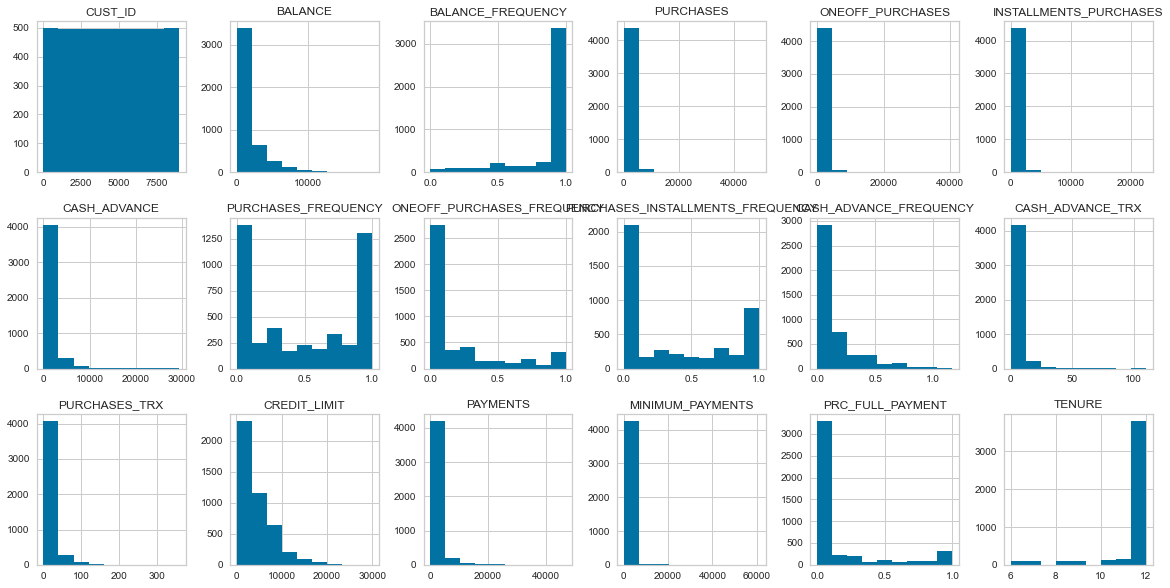

In [6]:
# Create distibution plot for analysis

num_features = [feature for feature in data.columns if data[feature].dtypes!='object']
data[num_features].hist(bins=9, figsize=(20,10), layout=(3, 6))


> Dari grafik diatas bisa dilihat bahwa distribusi pada dataset mayoritas skewed

**Biavariate Analysis**

**- Balance**

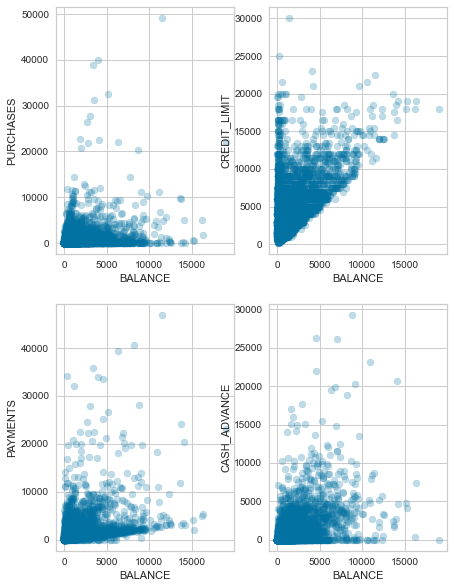

In [7]:
# Create plot analysis

plt.figure(figsize=(7,10))
columns = ['PURCHASES','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(data['BALANCE'], data[x], alpha=0.25)
    plt.xlabel('BALANCE')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

> Analisa :
- balance vs purchases : User yang memiliki saldo dibawah $ 10.000 melakukan pembelian hampir sama dengan jumlah saldo yang mereka miliki.,
- balance vs credit limit :  User kebanyakan memiliki saldo dibawah $ 5.000 tetapi untuk belanja merek hampir 3x lipat dari saldo yang dimiliki
- balance vs payment : saldo yang dimiliki dan penbayaran seimbang
- balance vs cash advance : penarikan uang cash pada kartu kredit setara dengan saldo yang mereka miliki.


**- Purchase**

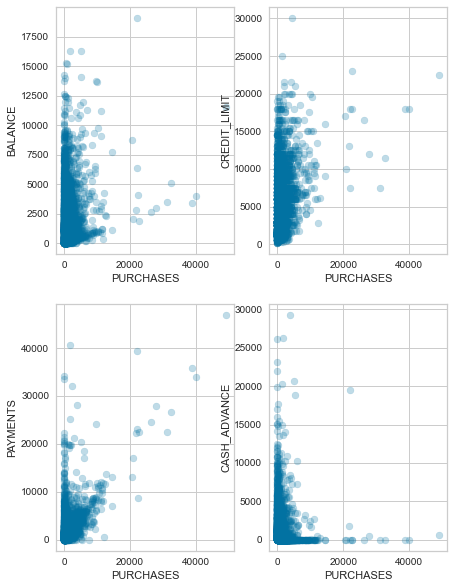

In [8]:
# Create plot analysis

plt.figure(figsize=(7,10))
columns = ['BALANCE','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(data['PURCHASES'], data[x], alpha=0.25)
    plt.xlabel('PURCHASES')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

Analisa : 
- purchase vs balance : untuk pembelian masih sesuai dengan saldo yg dimiliki
- purchase vs credit_limit : terdapat beberpa user yang belanja menggunakan credit card dengan nominal dibawah $10.000
- purchase vs payment : kebanyakan user belanja di bawah nominal $ 10.000. tetapi ada beberapa user juga yang belanja sampai tembus hampir $50.000
- purchase vs cash advance : pembelian dan penarikan tunai mungkin terkadang tidak ada korelasinya, karena belum tentu penarikan tunai yg dilakukan oleh user bisa dipastikan untuk belanja.

**Credit Limit**

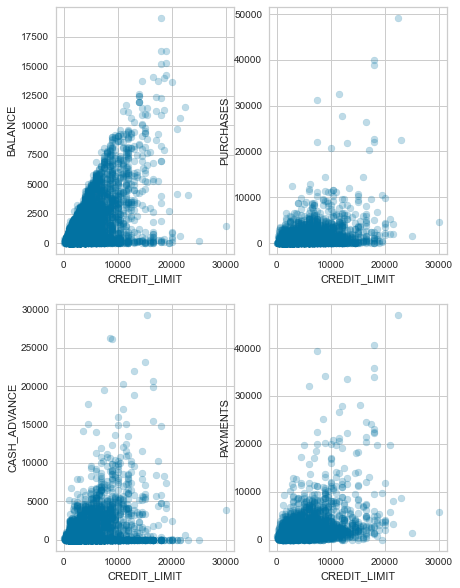

In [9]:
# Create plot analysis

plt.figure(figsize=(7,10))
columns = ['BALANCE', 'PURCHASES','CASH_ADVANCE', 'PAYMENTS']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(data['CREDIT_LIMIT'], data[x], alpha=0.25)
    plt.xlabel('CREDIT_LIMIT')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

Analisa : 
- credit limit vs balance : credit limit yang disediakn oleh pihak bank mayoritas dikeluarkan dibawah $ 10.000, untuk pemakaian masih terbilang normal secara global,
- credit limit vs purchase :  credit limit yang dipakai sesuai dengan porsinya, kebanyakan user belanja < 10.000, tetapi ada juga yg mana maksimal limitnya ada di $ 30.000, tetapi belanja sampai dengan $50.000
- credit limit vs cash advance :  user sepertinya tidak terlalu sering tarik tunai sampai batas pagu, ada beberapa kemungkinan, bisa jadi karena jumlah pagu nya sudah berkurang atau memang  user sering belanja menggunakan credit card, tetapi ada juga user yang menggunakana limitnya yg mana maksimal di angka `$ 30.000` dan melakukan transkasi tarik tunai hampir di angka $ 30.000
- credit limit vs payment :  nayoritas user menggunakan credit card sewajarnya, masih dibawah credit limit, tetapi ada  juga yang belanja menggunakan credit card sampai melebihi batas limitnya.

**Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

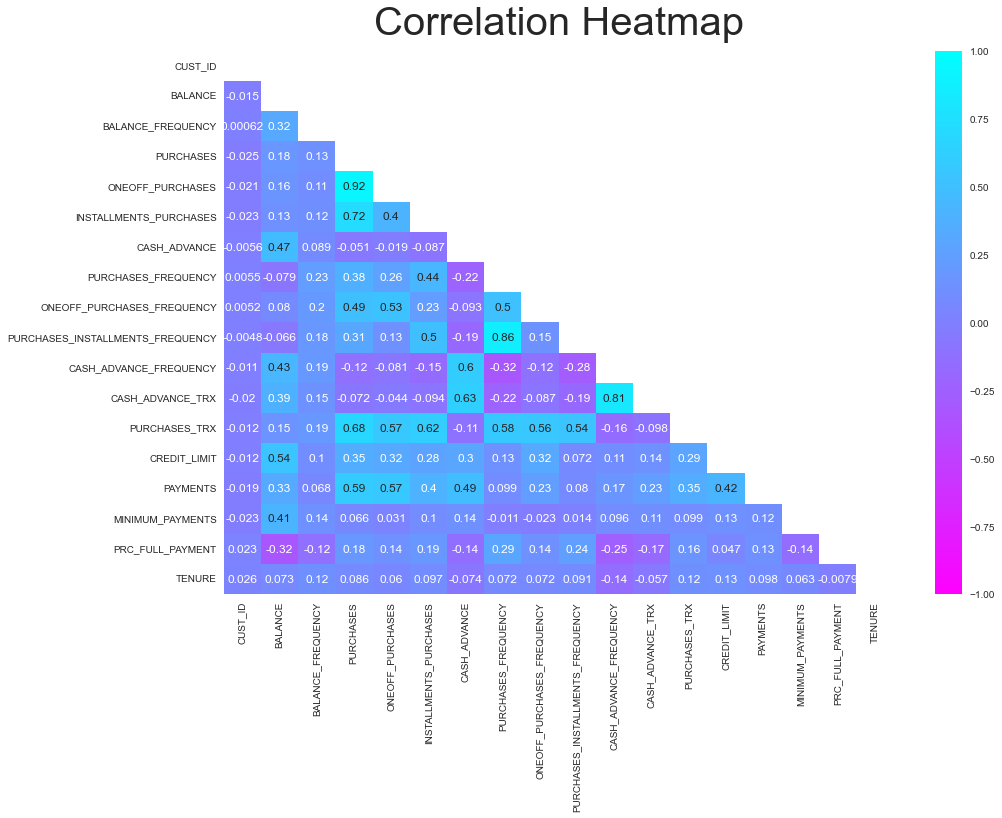

In [10]:

plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='cool_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=16)

**Strong corellation: (> 0.50)**
- balance dengan (credit limit),
- purchase dengan (payments, purchase_trx, installments_purchase, oneoff_purchase) 
- oneoff purchases (payment, purchase trx, purchase trx)
- installments purchase ( purchase trx, onoff purchase frequency)
- cash advance (cash advance frequency, cash advance trx)
- oneoff purchase frequncy (purchase trx)
- purchase installments frquency ( purchase trx)
- cash advance frequncy(cash advance trx)

# 5 - Data Preprocessing

**Inference Set Preparation**

In [11]:
# Inference Set Preparation
# Digunakan untuk mencoba masukkan data baru

inf_set = data.sample(15, random_state=17)
inf_set.shape

(15, 18)

**Splitting Dataset**

In [12]:
# Drop column "TENURE"
data.drop(["TENURE"], axis=1, inplace=True)

# Select data into X
X = np.array(data)


**Missing Values**

In [13]:
# Detect Missing Values

def missing_values_table_(data) :

    # Total missing values
    mis_val = dataset.isnull().sum()

    # Precentage of missing values
    mis_val_percent = 100 * dataset.isnull().sum() / len(dataset)

    # Make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(dataset.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [14]:
# Missing Values Dataset

train_missing = missing_values_table_(data)
train_missing

Your selected dataframe has 18 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MINIMUM_PAYMENTS,158,3.5
CREDIT_LIMIT,1,0.0


> Terdapat missing values pada `minimum_payment` dan `credit_limit`

**Handling Missing Value**

fill the null values with the means

In [15]:
# solution

data["MINIMUM_PAYMENTS"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)
data["CREDIT_LIMIT"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [16]:
# test
round(data.isnull(). sum(axis=0)*100/data.shape[0],2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
dtype: float64

> Dataset diatas sudah tidak ada missing values, dan sudah di handling dengan metode `fillna`

**Outlier Detection**

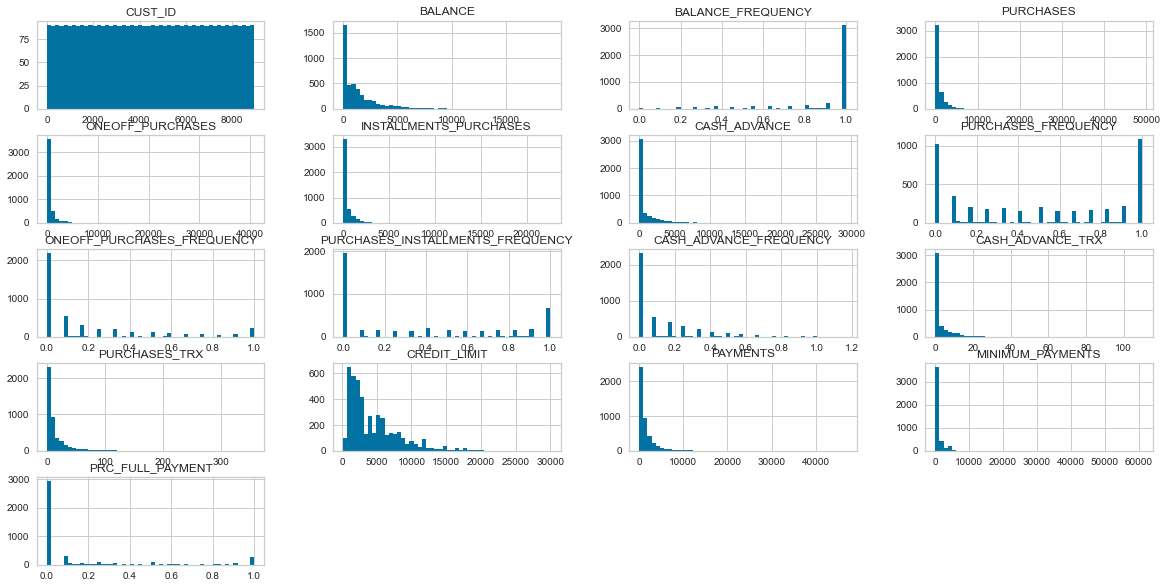

In [17]:
# Outliers
histOut = data.hist(bins=50, figsize=(20,10))
histOut
plt.show()

Grafik diatas menunjukkan bahwa distribusi skewed

In [18]:
def find_outlier(data, feature):
    print('OUTLIER ' + feature)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR : {iqr}')

    Lower_limit = q1 - limit
    Upper_limit = q3 + limit

    total_count = Lower_limit + Upper_limit
    percentage = format(len(data[data[feature] > Upper_limit])/len(data)*100)

    print(f'Lower_Limit : {Lower_limit}')
    print(f'Upper_limit : {Upper_limit}')
    print(f'Percentage : {percentage}')
    print('----------------------------------------------------------')

In [19]:
for i in data :
    find_outlier (data, i)

OUTLIER CUST_ID
IQR : 4474.0
Lower_Limit : -4472.0
Upper_limit : 13424.0
Percentage : 0.0
----------------------------------------------------------
OUTLIER BALANCE
IQR : 1925.98281
Lower_Limit : -2756.437862
Upper_limit : 4947.493378
Percentage : 7.5530726256983245
----------------------------------------------------------
OUTLIER BALANCE_FREQUENCY
IQR : 0.11111099999999996
Lower_Limit : 0.7222225000000001
Upper_limit : 1.1666664999999998
Percentage : 0.0
----------------------------------------------------------
OUTLIER PURCHASES
IQR : 1082.5749999999998
Lower_Limit : -1583.7974999999997
Upper_limit : 2746.5024999999996
Percentage : 8.581005586592179
----------------------------------------------------------
OUTLIER ONEOFF_PURCHASES
IQR : 580.32
Lower_Limit : -870.48
Upper_limit : 1450.8000000000002
Percentage : 10.882681564245809
----------------------------------------------------------
OUTLIER INSTALLMENTS_PURCHASES
IQR : 484.255
Lower_Limit : -726.3824999999999
Upper_limit : 1210

kali ini untuk outlier tidak akan dihapus, dikarenakan sesuai dengan kondisi keuangan user.


**Data Anomali**

In [20]:
# Anomaly 1

data[data['BALANCE'] > data['CREDIT_LIMIT']]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
161,2584,1016.583226,1.0,120.00,0.00,120.00,0.000000,0.500000,0.000000,0.500000,0.000000,0,9,1000.0,358.031022,853.500194,0.0
335,5336,1574.330411,1.0,869.26,0.00,869.26,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,1500.0,1341.941189,1534.646713,0.0
371,8338,1521.763256,1.0,312.15,0.00,312.15,0.000000,0.750000,0.000000,0.750000,0.000000,0,19,1500.0,671.706560,1458.363763,0.0
388,14,3215.903805,1.0,745.48,0.00,745.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,35,2500.0,0.000000,4494.020175,0.0
393,90,4972.108843,1.0,2072.57,45.65,2026.92,0.000000,1.000000,0.083333,1.000000,0.000000,0,37,4500.0,1497.318035,29019.802880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,2038,3028.512053,1.0,0.00,0.00,0.00,353.510250,0.000000,0.000000,0.000000,0.583333,10,0,3000.0,820.085077,1187.871281,0.0
4195,4246,3013.590493,1.0,0.00,0.00,0.00,341.360876,0.000000,0.000000,0.000000,0.583333,7,0,3000.0,750.160714,1329.881951,0.0
4259,5052,2053.441598,1.0,493.85,441.35,52.50,1738.333780,0.500000,0.333333,0.250000,0.833333,16,10,2000.0,2795.059574,2661.324808,0.0
4262,2542,1094.632736,1.0,503.41,0.00,503.41,445.031842,1.000000,0.000000,1.000000,0.833333,21,21,1000.0,1108.862245,1194.024777,0.0


> Balance merupakan pagu sebuah kartu kredit, yang mana untuk credit limit adalah maksimal pemakaian dalam sebuan.

In [21]:
# Anomaly 2

data[data['MINIMUM_PAYMENTS'] > data['PAYMENTS']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,788,16.581535,0.125,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,4494.020175,0.000000
1,1902,943.584041,0.875,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000
2,2322,1.979916,0.125,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,4494.020175,0.000000
5,4266,2237.238086,1.000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000
6,4360,2730.843802,1.000,2900.00,2900.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2900.0,0.000000,4494.020175,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,6228,951.675294,1.000,0.00,0.00,0.00,1090.520215,0.000000,0.000000,0.000000,0.272727,3,0,1200.0,178.362607,340.410195,0.000000
4458,8136,1360.795674,1.000,0.00,0.00,0.00,462.861443,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,303.031979,443.781316,0.000000
4464,7240,4372.395867,1.000,569.91,569.91,0.00,520.844673,0.272727,0.272727,0.000000,0.272727,9,5,4500.0,1345.099869,3937.465141,0.000000
4466,6900,7468.012010,1.000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000


> Minimum payment merupakan pembayaran yang bisa dilakuakn user jika tidak bisa membayar secara penuh pada bulan terbitnya tagihan, sehingga unyuk payment mengikuti surat elektronik yang bisa tertagih ke pihak user. Untuk anomali ini memiliki payemnt lebih besar dibanding dengn minimumnya, bisa jadi dikarenakan user ingin melunasi lebih cepat atau user belanja sebelum tanggal tebit tagihan, sehingga tidak ter record


In [22]:
# Anomaly 3

data[data['INSTALLMENTS_PURCHASES'] > data['CREDIT_LIMIT']]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
242,8334,131.835930,0.545455,2234.02,0.00,2234.02,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,2000.0,4432.954833,153.812848,1.000000
298,2286,135.357366,0.818182,1592.57,1132.05,460.52,0.000000,0.750000,0.666667,0.500000,0.000000,0,28,300.0,1907.282354,197.512598,0.875000
443,546,1276.941373,1.000000,2196.54,1037.80,1158.74,0.000000,1.000000,0.333333,1.000000,0.000000,0,44,1000.0,1410.009813,3446.470208,0.000000
485,968,877.603886,1.000000,7786.40,215.00,7571.40,0.000000,1.000000,0.083333,1.000000,0.000000,0,68,6500.0,7328.487542,2494.776569,0.916667
516,1320,1884.252524,1.000000,1358.88,116.63,1242.25,0.000000,1.000000,0.166667,1.000000,0.000000,0,79,1200.0,303.560901,18959.869380,0.000000
566,1896,420.348086,1.000000,3986.24,833.24,3153.00,0.000000,1.000000,0.166667,1.000000,0.000000,0,22,1500.0,3100.021072,202.854078,0.666667
642,2726,339.294514,1.000000,2601.60,0.00,2601.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1800.0,2582.183540,2374.370421,0.909091
654,2810,1369.504264,1.000000,1603.80,0.00,1603.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1300.0,1591.602315,1278.329537,0.000000
682,3082,112.037368,1.000000,1006.69,0.00,1006.69,0.000000,1.000000,0.000000,0.888889,0.000000,0,11,1000.0,1000.036596,123.408318,1.000000
688,3136,1205.024103,1.000000,1247.43,0.00,1247.43,0.000000,1.000000,0.000000,1.000000,0.000000,0,41,1000.0,1314.358147,2812.820485,0.000000


> Data diatas menunjukkan bahwa terdapat pembelian yang melebihi dari limit credit, sehingga itu membuat data menjadi aneh

**Feature Selection**

**Scaler**

Untuk scaller kita coba memakai metode MinMaxScaler, StandardScaler, dan RobustScaler

In [23]:
# Feature selection
data_scaled = data.copy()
col_names = data_scaled.columns
features = data_scaled[col_names]

In [24]:
# Menggunakan MinMaxScaler

data_MinMaxScaler = data.copy()
scaler_MinMax = MinMaxScaler()

data_MinMaxScaler[col_names] = scaler_MinMax.fit_transform(features.values)
data_MinMaxScaler.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,0.500000,0.082221,0.877608,0.020456,0.014438,0.018446,0.033244,0.490122,0.202614,0.364989,0.114991,0.029058,0.040476,0.145502,0.036782,0.016105,0.157206
std,0.288772,0.109814,0.235604,0.045082,0.040884,0.041216,0.072859,0.399874,0.298502,0.397336,0.170760,0.059092,0.067475,0.122898,0.063099,0.038715,0.295869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.006960,0.888889,0.000817,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.045226,0.008315,0.002803,0.000000
50%,0.500000,0.045943,1.000000,0.007392,0.000736,0.003976,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.095477,0.017708,0.005473,0.000000
75%,0.750000,0.108098,1.000000,0.022893,0.014237,0.021522,0.037517,0.916667,0.333333,0.750000,0.155844,0.036364,0.047486,0.195980,0.040399,0.015298,0.166667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Menggunakan Standard Scaler

data_StandardScaler = data.copy()
scaler_std = StandardScaler()

data_StandardScaler[col_names] = scaler_std.fit_transform(features.values)
data_StandardScaler.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03,4.475000e+03
mean,-4.470663e-17,-3.654432e-17,3.025463e-15,-7.688864e-16,1.125884e-15,-2.086549e-15,1.147675e-14,-2.427506e-15,-3.560417e-15,-7.695992e-15,7.350942e-15,-1.471965e-14,-3.373900e-16,6.358663e-17,-4.400081e-16,2.282935e-17,1.067794e-14
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.731664e+00,-7.488115e-01,-3.725338e+00,-4.538016e-01,-3.531776e-01,-4.475835e-01,-4.563293e-01,-1.225829e+00,-6.788448e-01,-9.186913e-01,-6.734794e-01,-4.917998e-01,-5.999379e-01,-1.184059e+00,-5.829971e-01,-4.160291e-01,-5.313939e-01
25%,-8.658319e-01,-6.854265e-01,4.788603e-02,-4.356773e-01,-3.531776e-01,-4.475835e-01,-4.563293e-01,-1.017407e+00,-6.788448e-01,-9.186913e-01,-6.734794e-01,-4.917998e-01,-5.585357e-01,-8.160199e-01,-4.512119e-01,-3.436299e-01,-5.313939e-01
50%,0.000000e+00,-3.303911e-01,5.195385e-01,-2.898255e-01,-3.351798e-01,-3.511162e-01,-4.563293e-01,2.470550e-02,-3.996430e-01,-4.991838e-01,-6.734794e-01,-4.917998e-01,-3.101229e-01,-4.070879e-01,-3.023255e-01,-2.746366e-01,-5.313939e-01
75%,8.658319e-01,2.356680e-01,5.195385e-01,5.405027e-02,-4.911949e-03,7.466097e-02,5.865121e-02,1.066818e+00,4.379657e-01,9.690889e-01,2.392692e-01,1.236376e-01,1.038986e-01,4.107762e-01,5.732890e-02,-2.083396e-02,3.198199e-02
max,1.731664e+00,8.358502e+00,5.195385e-01,2.173037e+01,2.410875e+01,2.381753e+01,1.327035e+01,1.275240e+00,2.671590e+00,1.598349e+00,5.183332e+00,1.643273e+01,1.422203e+01,6.953689e+00,1.526697e+01,2.541673e+01,2.848854e+00


In [26]:
# Menggunakan Robust Scaler

data_RobustScaler = data.copy()
scaler_RS = RobustScaler()

data_RobustScaler[col_names] = scaler_RS.fit_transform(features.values)
data_RobustScaler.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,4.475000e+03,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,-8.497238e-19,0.358694,-1.101528,0.591810,0.962426,0.672322,0.886110,-0.011854,0.357843,0.264429,0.737859,0.799106,0.468156,0.331830,0.594496,0.850805,0.943232
std,5.775438e-01,1.085786,2.120442,2.042180,2.871692,1.915026,1.942038,0.479848,0.895507,0.529782,1.095714,1.625042,1.509752,0.815222,1.966630,3.098278,1.775212
min,-1.000000e+00,-0.454264,-9.000009,-0.334831,-0.051678,-0.184717,0.000000,-0.600000,-0.249999,-0.222223,0.000000,0.000000,-0.437500,-0.633333,-0.551916,-0.438024,0.000000
25%,-5.000000e-01,-0.385449,-1.000000,-0.297822,-0.051678,-0.184717,0.000000,-0.500000,-0.249999,-0.222223,0.000000,0.000000,-0.375000,-0.333333,-0.292772,-0.213737,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e-01,0.614551,0.000000,0.702178,0.948322,0.815283,1.000000,0.500000,0.750001,0.777777,1.000000,1.000000,0.625000,0.666667,0.707228,0.786263,1.000000
max,1.000000e+00,9.433227,0.000000,44.964173,70.187586,46.278407,26.654751,0.600000,2.750004,1.111111,6.416675,27.500000,21.937500,6.000000,30.615620,79.590112,5.999988


Dalam pemilihan scaler, kali ini menggunakan RobustScaler, dikarenakan menggunakan nilai median dan quartiles

Variance Inflation Factor
    - mendeteksi multikolinieritas

In [27]:
# Extracting the numerical columns
data = data[columns]
cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]

# Vif dataframe
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns

# Calculating VIF for each feature
vif_data['VIF']= [variance_inflation_factor(data.values, i) 
for i in range(len(data.columns))]

# Print the Vif of each features
print(vif_data)

        Feature       VIF
0       BALANCE  1.797758
1     PURCHASES  2.477718
2  CASH_ADVANCE  2.491009
3      PAYMENTS  3.482636


> VIF pada feature diatas < 10, maka artinya tidak terjadi multikolinieritas dalam model. Sehingga dapat disimpulkan bahwa model regresi berikut baik, krn tidak ada multikolinieritas.

# 6 - Model Definition

PCA Untuk mengubah 3D menjadi 2D

In [28]:
# PCA
pca = PCA()

Berikut terdapat model untuk clustering:
1. Kmeans
2. Agglomerative Clustering
3. Spectral Clustering

In [29]:
# Clustering - KMeans
kmeans = KMeans(n_clusters=5, random_state=26)

In [30]:
# Clustering - Agglomerative
agglo = AgglomerativeClustering(n_clusters=4)

In [31]:
# Clustering - DBsc
spectral = SpectralClustering(n_clusters=6, random_state=26)

# 7 - Model Training

In [32]:
# Menentukan komponene PCA yang digunakan
pca.fit(data_MinMaxScaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

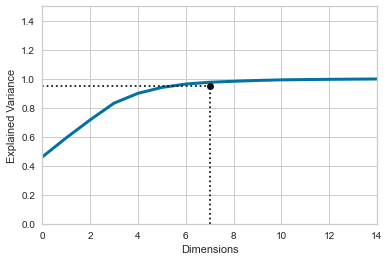

In [33]:
# Elbow Method 95%

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1.5])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

> Setting untuk menentukan titik siku di komponen 95%. artinya kita menentukan  informasi yang dibawa ada sekitar 95%

In [34]:
# Komponen dari 95%

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(data_MinMaxScaler)
pca.n_components_

7

> feature berkurang karena yang dipakai 95%


In [35]:
# Jumlah EVR

np.sum(pca.explained_variance_ratio_)

0.963877998737536

> prosentase componen yang dihasilkan ada 96.38%

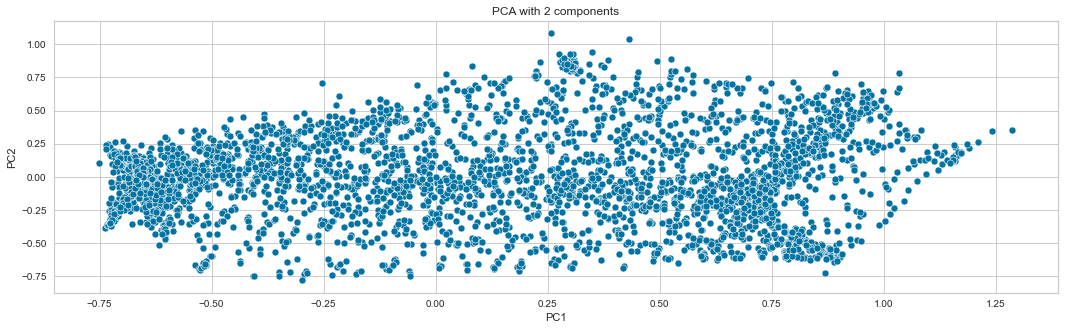

In [36]:
#  Visualisasi X ke dalam 2D

pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(data_MinMaxScaler)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

**MODEL KMeans**

In [37]:
# Menentukan nilai K
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(data_MinMaxScaler)
                for k in range(1, 9)]

Elbow Method


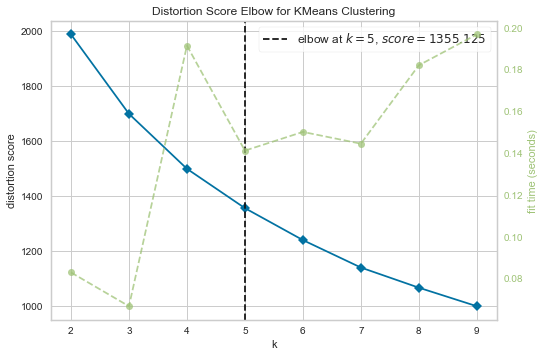

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# print elbow graph for k

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_MinMaxScaler)
Elbow_M.show()

> Pada grafik Kmeans menunjukkan bahwa potongan (k) berada di angka 5 dengan score 1355.13

In [39]:
# menentukan k menggunakan inertias

k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_MinMaxScaler)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [40]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(data_MinMaxScaler, model.labels_)
                     for model in kmeans_per_k[1:]]

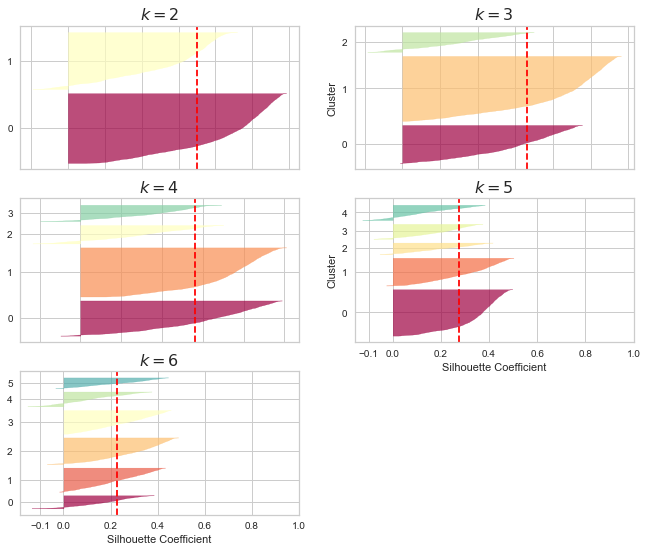

In [41]:
# Membuat plot silhouette_scores

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_MinMaxScaler, y_pred)

    padding = len(data_MinMaxScaler) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Untuk silhouette_scores kita memilih k = 5 karena terlihat lebih balance

**Model Agglomerative**

Elbow Method


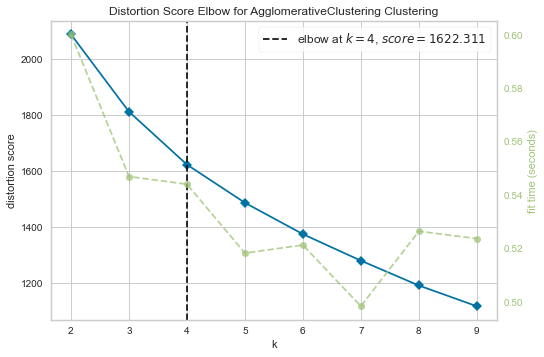

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# print elbow graph for k

print('Elbow Method')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=9)
Elbow_M.fit(data_MinMaxScaler)
Elbow_M.show()

> Pada grafik Agglomerative menunjukkan bahwa potongan (k) berada di angka 4 dengan score 1622,3

In [43]:
k=[2,3,4,5,6,7,8,9]
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(data_MinMaxScaler)
                for k in range(1, 9)]

In [44]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(data_MinMaxScaler, model.labels_)
                     for model in agglo_per_k[1:]]

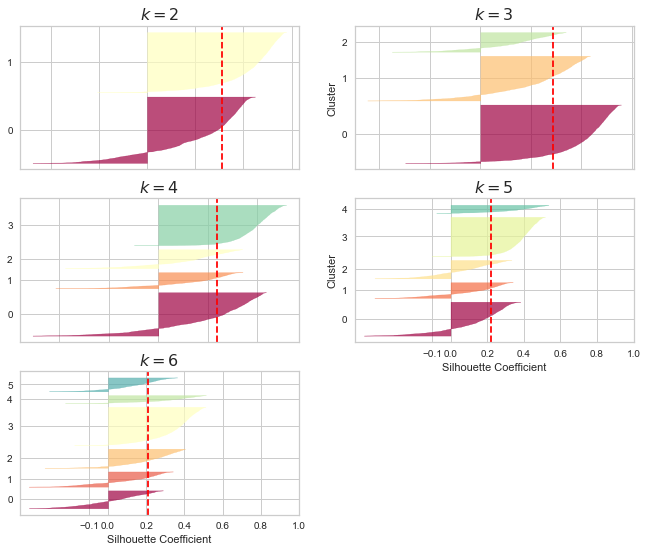

In [45]:
# Membuat plot silhouette_scores

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = agglo_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_MinMaxScaler, y_pred)

    padding = len(data_MinMaxScaler) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Untuk silhouette_scores kita memilih k = 4 karena sesuai dengan elbow method

**Model Spectral**

In [46]:
# Menentukan nilai K
spectral_per_k = [SpectralClustering(n_clusters=k, random_state=26).fit(data_MinMaxScaler)
                for k in range(1, 9)]

Elbow Method


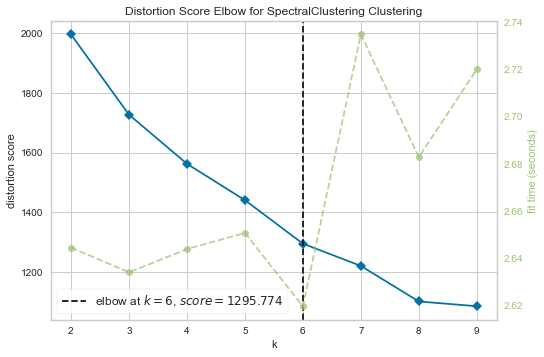

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# print elbow graph for k

print('Elbow Method')
Elbow_M = KElbowVisualizer(SpectralClustering(), k=9)
Elbow_M.fit(data_MinMaxScaler)
Elbow_M.show()

> Pada grafik Spectral menunjukkan bahwa potongan (k) berada di angka 6, dengan score 1295,892

In [48]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(data_MinMaxScaler, model.labels_)
                     for model in spectral_per_k[1:]]

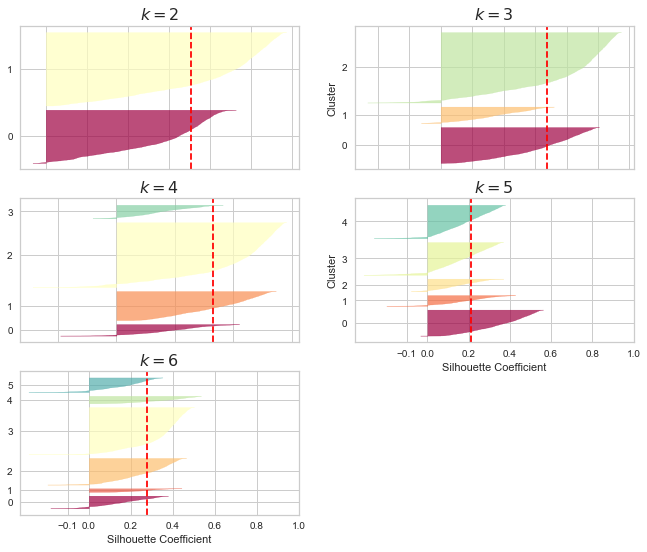

In [49]:
# Membuat plot silhouette_scores

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = spectral_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_MinMaxScaler, y_pred)

    padding = len(data_MinMaxScaler) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Untuk silhouette_scores kita memilih k = 6 karena terlihat lebih balance

**Model Training KMeans**

In [50]:
# Fit menggunakan MinMaxScaler
kmeans.fit(data_MinMaxScaler)

KMeans(n_clusters=5, random_state=26)

**Model Training Agglomerative**

In [51]:
# Fit menggunakan MinMaxScaler
agglo.fit(data_MinMaxScaler)

AgglomerativeClustering(n_clusters=4)

**Model Training Agglomerative**

In [52]:
# Fit menggunakan MinMaxScaler
agglo.fit(data_MinMaxScaler)

AgglomerativeClustering(n_clusters=4)

**Model Training Spectral**

In [53]:
# Fit menggunakan MinMaxScaler
spectral.fit(data_MinMaxScaler)

SpectralClustering(n_clusters=6, random_state=26)

# 9 - Model Evaluation

**MODEL EVALUASI KMEANS**

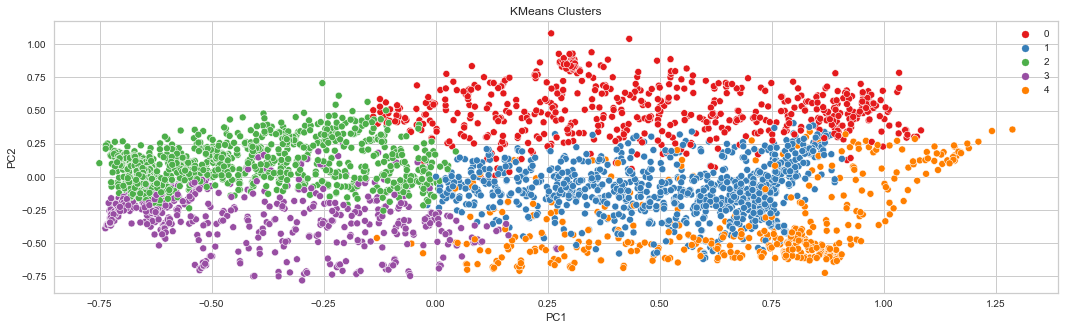

In [54]:
# Berikut merupakan clustering dari Kmeans

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Berikut adalah scatterplot 2D dari KMeans yang mana dari semua data ada yang berseberangan dengan clusternya. Untuk contoh paling banyak berseberangan adalah data cluster 4, yang mana dia masuk ke cluster 1 dan 0

In [55]:
# Hasil clustering dari kmeans
X_cluster1 = data.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1.head(10)

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,cluster
0,16.581535,200.0,0.0,0.000000,3
1,943.584041,103.0,0.0,215.325023,2
2,1.979916,80.0,0.0,0.000000,3
3,461.455720,585.0,0.0,258.032630,2
4,1053.594730,1450.0,0.0,397.090516,2
5,2237.238086,120.0,0.0,343.102984,2
6,2730.843802,2900.0,0.0,0.000000,2
7,424.994385,1200.0,0.0,57.266292,3
8,18.885677,57.0,0.0,0.000000,3
9,0.004816,51.7,0.0,33.249088,3


Dataframe diatas merupakan hasil dari pengclusteran di Kmeans

**EDA untuk Kmeans**

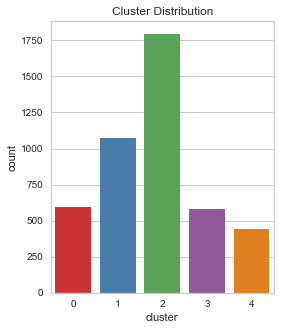

In [56]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

Jumlah cluster untuk Kmeans ada 5, Cluster yang paling tinggi ada di no. 2 dengan jumlah distribusi ada 1750 dan paling sedikit ada di cluster 4, dengan jumlah dibawah 500.

**MODEL EVALUASI AGGLOMERATIVE**

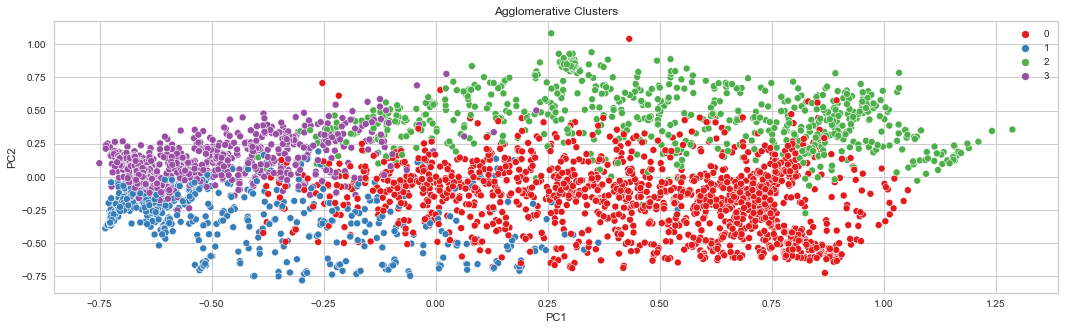

In [57]:
# Berikut merupakan clustering dari Agglomerative

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=agglo.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()

Berikut adalah scatterplot 2D dari Agglomerative yang mana dari semua data ada yang berseberangan dengan clusternya.

**Agglomerative**

In [58]:
# Hasil clustering dengan Agglomerative

X_cluster2 = data.copy()
X_cluster2['cluster'] = agglo.labels_
X_cluster2.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,cluster
0,16.581535,200.0,0.0,0.000000,1
1,943.584041,103.0,0.0,215.325023,3
2,1.979916,80.0,0.0,0.000000,1
3,461.455720,585.0,0.0,258.032630,3
4,1053.594730,1450.0,0.0,397.090516,3


Dataframe diatas merupakan hasil dari pengclusteran di Agglomerative

**EDA untuk Agglomerative**

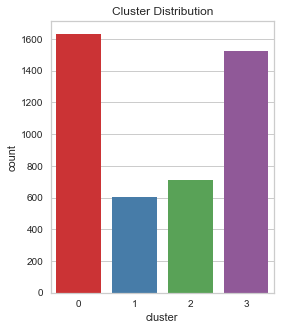

In [59]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster2, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

untuk hasil dari agglo, cluster tertinggi ada di 0, dan paling rendah ada di cluster 1, dari sini terlihat jomplang antara cluster tertinggi dan paling rendah.

**MODEL EVALUASI SPECTRAL**

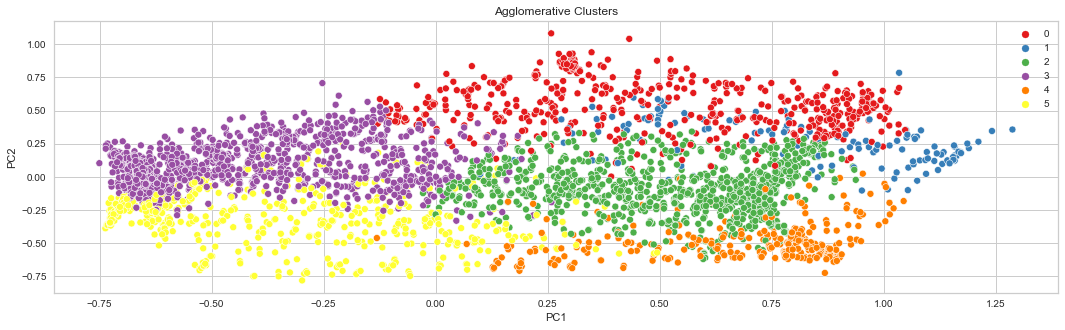

In [60]:
# Berikut merupakan clustering dari Spectral

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=spectral.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()

Berikut adalah hasil scatterplot untuk Spectral, yang mana dari 6 cluster, semuanya tumpang tindih untuk , sehingga data tidak terlihat bagus

**Spectral**

In [61]:
# Hasil Clustering dengan Spectral

X_cluster3 = data.copy()
X_cluster3['cluster'] = spectral.labels_
X_cluster3.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,cluster
0,16.581535,200.0,0.0,0.000000,5
1,943.584041,103.0,0.0,215.325023,3
2,1.979916,80.0,0.0,0.000000,5
3,461.455720,585.0,0.0,258.032630,3
4,1053.594730,1450.0,0.0,397.090516,3


Dataframe dari hasil pengclusteran Model Spectral

**EDA untuk Spectral**

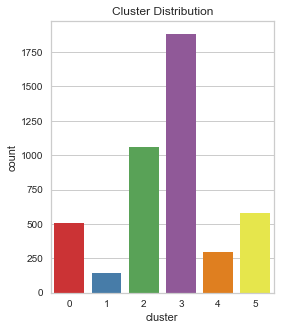

In [62]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

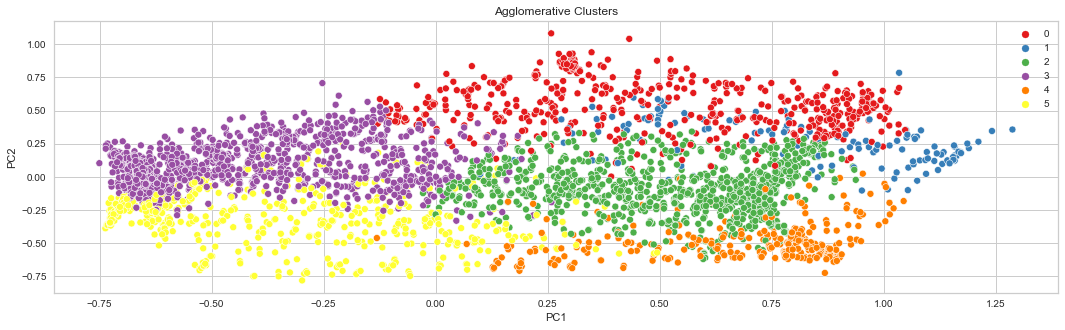

In [63]:
# Berikut merupakan clustering dari Spectral

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=spectral.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()

Dari data diatas menunjukkan bahwa distribusi paling banyak ada di cluster 3, dan paling sedikit ada di cluster 1, yang mana cluster 1 terlihat terlalu banyak, sehingga data terlihat tidak terdistibusi secara merata.

In [64]:
data_compare = pd.DataFrame({'Model' : ['K-Means', 'Agglomerative', 'Spectral'],
              'N Cluster' : [5, 4, 6], 'Silhouette Score' : [1355.13, 1622.3, 1295.892]})

data_compare

,Model,N Cluster,Silhouette Score
0,K-Means,5,1355.130
1,Agglomerative,4,1622.300
2,Spectral,6,1295.892


Dataset diatas menunjukkan bahwa score tertinggi ada di agglomerative dengan n cluster : 4 dan score 1622,3, sehingga untuk data test dipilih model agglomerative clustering

# 9 - Model Inference

> Dataset yang sudah diproses, mari kita coba dengan data yang baru

In [65]:
inf_set.shape

(15, 18)

**Load Model**

In [66]:
inf_set

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2463,7556,685.063917,1.000000,0.00,0.00,0.00,110.795488,0.000000,0.000000,0.000000,0.250000,4,0,700.0,308.035273,334.274864,0.000000,12
3291,3076,2027.896903,1.000000,933.50,933.50,0.00,1160.283340,0.083333,0.083333,0.000000,0.083333,2,1,3000.0,393.417404,462.153221,0.000000,12
3589,118,3985.637748,1.000000,20.00,20.00,0.00,1306.183990,0.083333,0.083333,0.000000,0.333333,5,1,6000.0,1203.180838,1148.848564,0.000000,12
3652,6480,2080.312991,0.888889,25.00,0.00,25.00,2422.889589,0.111111,0.000000,0.111111,0.333333,6,1,2500.0,540.687217,570.576789,0.000000,9
904,5600,91.029575,1.000000,1055.70,0.00,1055.70,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,5000.0,1083.300243,163.891113,1.000000,12
232,7618,212.080181,1.000000,618.00,333.00,285.00,0.000000,0.500000,0.083333,0.333333,0.000000,0,7,6000.0,378.383325,169.341588,0.000000,12
322,3994,1337.162883,1.000000,4544.48,2384.44,2160.04,0.000000,0.750000,0.083333,0.666667,0.000000,0,25,7500.0,3394.950090,380.300298,0.083333,12
3382,8300,90.084324,1.000000,1098.82,1098.82,0.00,181.725242,0.583333,0.583333,0.000000,0.083333,1,13,3000.0,1307.140981,141.008201,0.428571,12
2657,2654,4694.671605,1.000000,0.00,0.00,0.00,4174.716471,0.000000,0.000000,0.000000,0.500000,14,0,12000.0,8919.228234,1075.889659,0.000000,12
3303,5190,1855.212121,1.000000,32.22,32.22,0.00,37.743145,0.083333,0.083333,0.000000,0.083333,1,1,2000.0,349.584645,695.503633,0.000000,12


In [67]:
# Select data into X
X_inf = np.array(inf_set)
X_inf

array([[7.55600000e+03, 6.85063917e+02, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.10795488e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.50000000e-01, 4.00000000e+00,
        0.00000000e+00, 7.00000000e+02, 3.08035273e+02, 3.34274864e+02,
        0.00000000e+00, 1.20000000e+01],
       [3.07600000e+03, 2.02789690e+03, 1.00000000e+00, 9.33500000e+02,
        9.33500000e+02, 0.00000000e+00, 1.16028334e+03, 8.33330000e-02,
        8.33330000e-02, 0.00000000e+00, 8.33330000e-02, 2.00000000e+00,
        1.00000000e+00, 3.00000000e+03, 3.93417404e+02, 4.62153221e+02,
        0.00000000e+00, 1.20000000e+01],
       [1.18000000e+02, 3.98563775e+03, 1.00000000e+00, 2.00000000e+01,
        2.00000000e+01, 0.00000000e+00, 1.30618399e+03, 8.33330000e-02,
        8.33330000e-02, 0.00000000e+00, 3.33333000e-01, 5.00000000e+00,
        1.00000000e+00, 6.00000000e+03, 1.20318084e+03, 1.14884856e+03,
        0.00000000e+00, 1.20000000e+01],
       [6.480

In [68]:
# Feature Scaling
data_inf_final = scaler_MinMax.fit_transform(X_inf)
data_inf_final

array([[8.42355606e-01, 1.29214533e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.65396438e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01, 2.35294118e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.91763170e-01,
        0.00000000e+00, 1.00000000e+00],
       [3.34994337e-01, 4.20843924e-01, 1.00000000e+00, 2.04053082e-01,
        2.24968490e-01, 0.00000000e+00, 2.77931052e-01, 8.33330000e-02,
        1.42856653e-01, 0.00000000e+00, 1.11110667e-01, 1.17647059e-01,
        2.17391304e-02, 1.86991870e-01, 9.91525000e-03, 3.18646714e-01,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.46015763e-01, 1.00000000e+00, 4.37178537e-03,
        4.81989266e-03, 0.00000000e+00, 3.12879689e-01, 8.33330000e-02,
        1.42856653e-01, 0.00000000e+00, 4.44444000e-01, 2.94117647e-01,
        2.17391304e-02, 4.30894309e-01, 1.03951400e-01, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [7.204

In [69]:
# Fit terhadap Scaled
agglo.fit(data_inf_final)

AgglomerativeClustering(n_clusters=4)

In [70]:
# Hasil clustering dari kmeans
X_cluster_Inf = inf_set.copy()
X_cluster_Inf['cluster'] = agglo.labels_
X_cluster_Inf.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2463,7556,685.063917,1.000000,0.00,0.00,0.00,110.795488,0.000000,0.000000,0.000000,0.250000,4,0,700.0,308.035273,334.274864,0.000000,12,0
3291,3076,2027.896903,1.000000,933.50,933.50,0.00,1160.283340,0.083333,0.083333,0.000000,0.083333,2,1,3000.0,393.417404,462.153221,0.000000,12,0
3589,118,3985.637748,1.000000,20.00,20.00,0.00,1306.183990,0.083333,0.083333,0.000000,0.333333,5,1,6000.0,1203.180838,1148.848564,0.000000,12,2
3652,6480,2080.312991,0.888889,25.00,0.00,25.00,2422.889589,0.111111,0.000000,0.111111,0.333333,6,1,2500.0,540.687217,570.576789,0.000000,9,0
904,5600,91.029575,1.000000,1055.70,0.00,1055.70,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,5000.0,1083.300243,163.891113,1.000000,12,3
232,7618,212.080181,1.000000,618.00,333.00,285.00,0.000000,0.500000,0.083333,0.333333,0.000000,0,7,6000.0,378.383325,169.341588,0.000000,12,3
322,3994,1337.162883,1.000000,4544.48,2384.44,2160.04,0.000000,0.750000,0.083333,0.666667,0.000000,0,25,7500.0,3394.950090,380.300298,0.083333,12,1
3382,8300,90.084324,1.000000,1098.82,1098.82,0.00,181.725242,0.583333,0.583333,0.000000,0.083333,1,13,3000.0,1307.140981,141.008201,0.428571,12,3
2657,2654,4694.671605,1.000000,0.00,0.00,0.00,4174.716471,0.000000,0.000000,0.000000,0.500000,14,0,12000.0,8919.228234,1075.889659,0.000000,12,2
3303,5190,1855.212121,1.000000,32.22,32.22,0.00,37.743145,0.083333,0.083333,0.000000,0.083333,1,1,2000.0,349.584645,695.503633,0.000000,12,0


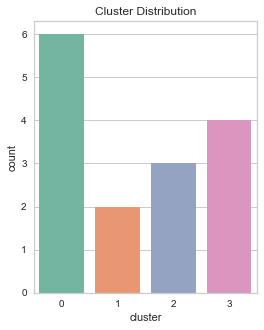

In [71]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster_Inf, x='cluster', palette='Set2')
plt.title('Cluster Distribution')
plt.show()

Dari inference set yang mana terdapat 15 columns dan 18 row dibagi menjadi 4 cluster yang mana tertinggi ada di cluster 0 dengan distribusi 6 data. dan paling sedikit ada di cluster 1.

**Answer :**
1. Inertia cluster merupakan total jarak pada setiap data ke setiap centroid nya, karena algoritma kmeans menghitung jarak yang mana semakin kecil inertia, semakin baik kemans nya. 
https://blog.sanbercode.com/docs/materi-eda/clustering/

2. Elbow Method merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat prosentasehasil perbandingan antara jumlah cluster yang membentuk siku pada suatu titik.
- Alasan menggunakan EM : grafiknya include score
- kelebihan dalam penggunaan EM : hasil atau siku pada titik tidak menentukan secara visual
- kekeurangan EM : jika disandigkan dengan shilutte terkadang distribusi datanya tidak bagus

3. Algoritma :
- K-means = menganalisis persebaran data serta bergantung pada inisialisasi centroid
- Agglomerative Clustering = proses pengelompokannya dilakukan secara bertingkat atau bertahap
- Spectral Clustering = pengelompokkan didasarkan atas kesamaan antara setiap data. Kesamaan tersebut dilihat dari keterkaitan antara setiap data. Pada Spectral Clustering akan dibentuk sebuah graph dari data yang ad

**Model Analysis :**
1. Menggunakan MinMaxScaler, dikarenakan jika memakakai scale yang lain, data terlihat outliers di shiluette dan hasil grafiknya tidak bagus,
2. Model algoritma yang dipilih adalah agglomerative clustring, karena berpatokan pada Elbow method, sehingga shiluette yang ditampilkan hanya untuk melihat distribusi data yang ada.

**Overall Analysis :**
1. Dataset diatas korelasi tertinggi ada di balance, purchases, cash advance, dan payment yang mana dengan metode clustering, feature tersebut digunakan untuk pengelompokkan data yang ada, 
2. Cluster dibagi menjadi 4 cluster yang mana sesuai dengan model Agglomerative clustering
3. dengan data inference diatas dapat disimpulkan bahwa :
- cluster 0 : 
    - purchase : user tidak terlalu signifikan memakai CC untuk metode pembayaran
    - cash advance :  kebanyakan dari cluster 0, user menggunakan CC untuk tarik tunai
    - payment : pambayaran user < $500
    - `kesimpulan` : user cluster 0 menggunakan CC sebagai metode tarik tunai
- cluster 1 :
    - balance : $ 1337 
    - purchase : pemakaian CC untuk metode pembayaran dengan nominal yang besar
    - cash advance : 0
    - payment : 74% dari purcahse langsung dibayar
    - `kesimpulan` : cluster 1 merupakan seseorang yang senang belanja dengan CC
- cluster 2 :
    - balance : range balance tidak berpengaruh
    - purchase : user tidak sering menggunakan metode pembayaran dengan CC
    - cash advance : CC digunakan untuk tarik tunai
    - payment : pembayaran sangat lancar dan tergolong besar jika dibandingkan dengan cluster 0
    - `kesimpulan` : cluster 2 merupakan user yang memanfaatkan CC untuk tarik tunai tetapi dengan jumlah payment yag besar diatas 90% dari tarik tunai
- cluster 3 :
    - balance : jumlah balance tidak berpengaruh dalam clustering ini
    - purchase :  user memanfaatkan CC untuk metode pembayaran
    - cash advance : CC tidak terlalu digunakan untuk metode tarik tunai
    - payment : payment yang dilakukan sangat besar
    - `kesimpulan` : cluster 3 merupakan user yang senang belanja menggunakan CC, terkdang juga digunakan untuk tarik tunai, sedangan untuk pembayaran tergolong besar.